# Unsupervised learning

 - finding __patterns__ in data
 - __clustering__ customers by their purchases
 - compressing data using purchase patterns (__dimension reduction__)

### Supervised vs unsupervised learning
- Supervised learning finds patterns for a __prediction__ task
- E.g. *classify* tumors as benign or cancerous (__labels__)
- Unsupervised learning finds patterns in data
- ... but without (labels) a specific prediction task in mind

### Dataset dimensions

- Dimension = number of features

## Clustering

### k-means clustering

- Finds clusters of samples (rows)
- Number of clusters must be specified 
- Implemented in __sklearn__ (scikit-learn) library

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())
print('\nTarget names: {}'.format(iris.target_names))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

# fitting the model with 2D array
model.fit(iris.data)

# now predicting the labels of the samples (data)
labels = model.predict(iris.data)

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Cluster labels for new samples
- New samples can be assigned to existing clusters
- k-means remembers the mean of each cluster (the "centroids")
- Finds the nearest centroid to each new sample

In [5]:
new_samples = [[5.7, 4.4, 1.5, 0.4],
               [6.5, 3.0, 5.5, 1.8],
               [5.8, 2.7, 5.1, 1.9]]

# to assaign new sampels to existing clusters 
new_labels = model.predict(new_samples)
print(new_labels)

[1 2 0]


In [6]:
col_names = iris.feature_names
col_names.append('species')
col_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [7]:
# lets visualize these samples on scatter plots
csv_path = 'csv_files/'

import pandas as pd

iris_df = pd.read_csv(csv_path + 'iris.csv', header=None, names=col_names)

iris_df.species = iris_df.species.map(lambda x: x[5:])
iris_df.species = iris_df.species.replace({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
})
iris_df.head(2)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


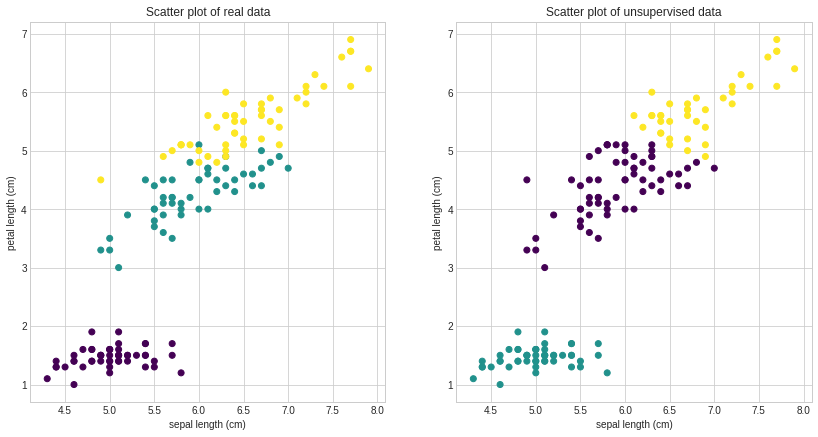

In [9]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[14, 7])

# real scatter plot
plt.subplot(1, 2, 1)

_ = plt.scatter(iris_df['sepal length (cm)'].values, iris_df['petal length (cm)'].values,
                c=iris_df.species, cmap='viridis')
_ = plt.xlabel('sepal length (cm)')
_ = plt.ylabel('petal length (cm)')
_ = plt.title('Scatter plot of real data')

# unsupervised scatter plot
plt.subplot(1, 2, 2)

# sepal length
x_sepal_l = iris.data[:, 0]

# petal length
y_petal_l = iris.data[:, 2]

_ = plt.scatter(x_sepal_l, y_petal_l, c=labels, cmap='viridis')
_ = plt.xlabel('sepal length (cm)')
_ = plt.ylabel('petal length (cm)')
_ = plt.title('Scatter plot of unsupervised data')

plt.show()

## EXERCISE

In [7]:
import pandas as pd
import numpy as np

coord_df = pd.read_csv(csv_path + 'cluster_coord.csv', header=None)
points = np.array(coord_df)
points[:2]

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079]])

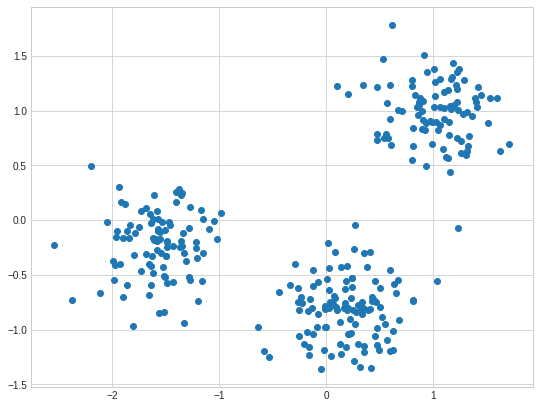

In [8]:
# scatter plot of the points data
plt.figure(figsize=[9,7])
_ = plt.scatter(x=points[:,0], y=points[:,1])
plt.show()

###Clustering 2D points

From the scatter plot before, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points.

In [9]:
new_coord_df = pd.read_csv(csv_path + 'cluster_coord_new.csv', header=None)
new_points = np.array(new_coord_df)
new_points[:2]

array([[ 0.40023333, -1.26544471],
       [ 0.80323037,  1.28260167]])

In [10]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 1 0 2 1 2 1 1 1 0 2 1 1 0 0 1 0 0 1 1 0 1 2 1 2 0 1 0 0 2 2 1 1 1 0 2 1
 1 2 1 0 2 2 0 2 1 0 0 1 1 1 1 0 0 2 2 0 0 0 2 2 1 1 1 2 1 0 1 2 0 2 2 2 1
 2 0 0 2 1 0 2 0 2 1 0 1 0 2 1 1 1 2 1 1 2 0 0 0 0 2 1 2 0 0 2 2 1 2 0 0 2
 0 0 0 1 1 1 1 0 0 1 2 1 0 1 2 0 1 0 0 1 0 1 0 2 1 2 2 1 0 2 1 2 2 0 1 1 2
 0 2 0 1 2 0 0 2 0 1 1 0 1 0 0 1 1 2 1 1 0 2 0 2 2 1 2 1 1 2 2 0 2 2 2 0 1
 1 2 0 2 0 0 1 1 1 2 1 1 1 0 0 2 1 2 2 2 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 2 0 2 2 0 2 0 2 0 1 1 0 1 1 1 0 2 2 0 1 1 0 1 0 0 1 0 0 2 0 2 2 2 1 0
 0 0 2 1 2 0 2 0 0 1 2 2 2 0 1 1 1 2 1 0 0 1 2 2 0 2 2 0 2 1 2 0 0 0 0 1 0
 0 1 1 2]


You've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful. In the next exercise, you'll inspect your clustering with a scatter plot!

<Figure size 432x288 with 0 Axes>

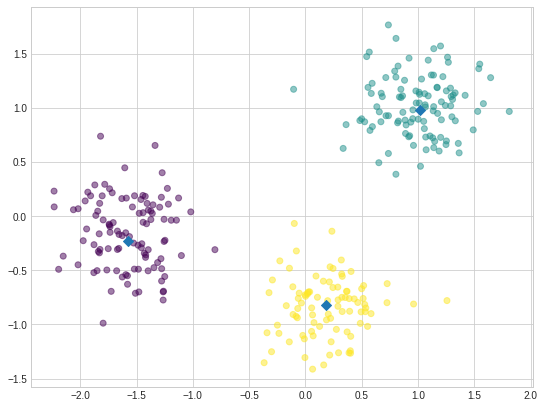

In [11]:
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

plt.set_cmap('viridis')
plt.figure(figsize=[9,7])

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Compute the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you evaluate the quality of a clustering?

## Evaluating Clustering

## EXERCISE

In [12]:
grain = pd.read_csv(csv_path + 'Grains/seeds.csv', header=None)
grain.head(1)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1


In [13]:
grain_samples = grain.iloc[:, :-1].values
grain_samples[:1, :]

array([[15.26 , 14.84 ,  0.871,  5.763,  3.312,  2.221,  5.22 ]])

### How many clusters of grain?

You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

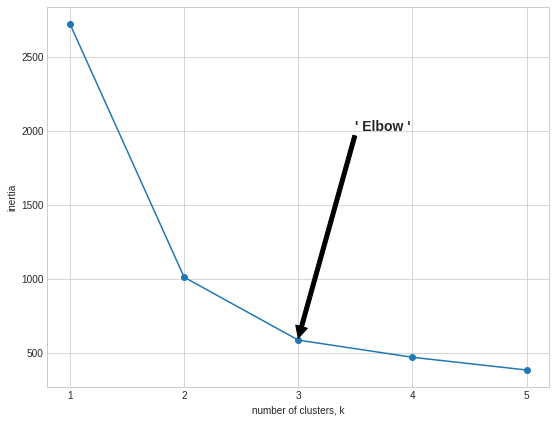

In [14]:
ks = range(1, 6)

# inertias are the distances of sample points from cluster centroids
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(grain_samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=[9,7])
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

plt.annotate(s="' Elbow '", xytext=(3.5, 2000),
             xy=(3, 600), arrowprops={'color': 'black'}, weight='bold', fontsize=14)
plt.show()

####How many clusters to choose?
- A good clustering has tight clusters (so low inertia)
- ... but not too many clusters!
- Choose an "elbow" in the inertia plot
- Where inertia begins to decrease more slowly

<font color='green'>The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.</font>

###Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [15]:
names = ['Kama wheat', 'Rosa wheat', 'Canadian wheat']
grain['varieties'] = grain[7].replace({
    1: names[0],
    2: names[1],
    3: names[2]
})
grain.head()

,0,1,2,3,4,5,6,7,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama wheat


In [16]:
varieties = grain['varieties'].values

In [17]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(grain_samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


In [18]:
len(varieties[varieties == 'Canadian wheat'])

70

The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. Is there anything you can do in such situations to improve your clustering?

## Transforming features for better clustering

In [19]:
pidemont_wine_df = pd.read_csv(csv_path + 'pidemont_wine.csv')
print(pidemont_wine_df.head(2))

   class_label class_name  alcohol  malic_acid   ash  alcalinity_of_ash  \
0            1     Barolo    14.23        1.71  2.43               15.6   
1            1     Barolo    13.20        1.78  2.14               11.2   

   magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0        127           2.80        3.06                  0.28   
1        100           2.65        2.76                  0.26   

   proanthocyanins  color_intensity   hue  od280  proline  
0             2.29             5.64  1.04   3.92     1065  
1             1.28             4.38  1.05   3.40     1050  


Piedmont wines dataset
- 178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
- Features measure chemical composition e.g. alcohol content
- ... also visual properties like “color intensity”

In [20]:
wine_samples = pidemont_wine_df.loc[:, 'alcohol':].values

In [21]:
# Clustering the wines
model = KMeans(n_clusters=3)

labels = model.fit_predict(wine_samples)

# create a DF that holds clustered labels and actual labels
df = pd.DataFrame({'labels': labels, 
                   'varieties': pidemont_wine_df['class_name'].values})

# create the crosstabularisation of clustered and actual labels
ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               29      13          20
1               19       0          50
2                0      46           1


As can be seen, things aren't worked out too well. 1/30 of Grignolino wines are associated with Barbera wines etc. This is due to high <font color='green'>__variances__</font> of the feature variables. For example:

In [22]:
np.var(pidemont_wine_df)[np.var(pidemont_wine_df) > 10]

alcalinity_of_ash       11.090031
magnesium              202.843328
proline              98609.600966
dtype: float64

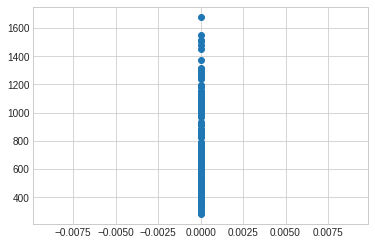

In [23]:
plt.scatter(x=[0 for x in range(0, len(pidemont_wine_df))], y=pidemont_wine_df['proline'].values)
plt.show()

- In KMeans the variances of the features influence the clustering. 
- The goal is to transform the variances of the features in the same order. 
- __StandardScaler__ transforms each feature to have mean 0 and variance 1.

In [24]:
from sklearn.preprocessing import StandardScaler

# create a standard scaler object
scaler = StandardScaler()

scaler.fit(wine_samples)

# scaling the same samples or the new ones
samples_scaled = scaler.transform(wine_samples)

Similar methods
- StandardScaler and KMeans have similar methods
- Use fit() / transform() with StandardScaler
- Use fit() / predict() with KMeans

In [25]:
# using pipeline to combine standardization and kmeans
scaler = StandardScaler()

kmeans = KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(wine_samples)

labels = pipeline.predict(wine_samples)

In [26]:
df = pd.DataFrame({'labels': labels, 
                   'varieties': pidemont_wine_df['class_name'].values})

ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0      59           3
1                0       0          65
2               48       0           3


## EXERCISE

###Scaling fish data for clustering

You are given an array 'fish_samples' giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

In [27]:
fish_df = pd.read_csv(csv_path + 'fish.csv', header=None)

# fish features
fish_samples = fish_df.drop(0, axis=1).values

# fish species (target variable)
fish_species = fish_df.iloc[:, 0]

fish_samples[:1,:], ' --- ', fish_species[:1]

(array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4]]), ' --- ', 0    Bream
 Name: 0, dtype: object)

In [28]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to samples
pipeline.fit(fish_samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(fish_samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': fish_species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0      0     13
1           33     0      1      0
2            0    17      0      0
3            1     0     19      1


## EXERCISE

###Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other. 

In [29]:
stock_df = pd.read_csv(csv_path + 'company-stock-movements-2010-2015-incl.csv')
stock_df.columns

Index(['Unnamed: 0', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22',
       '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29'],
      dtype='object', length=964)

In [30]:
# change the first, unnamed column
stock_df.rename(columns={'Unnamed: 0': 'company'}, inplace=True)

# gathering the feature variables
movements = stock_df.drop('company', axis=1).values

# gathering target variables
stock_companies = stock_df['company'].values

In [31]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

###Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

In [32]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': stock_companies})

# Display df sorted by cluster label
df.sort_values('labels')

,companies,labels
41,Philip Morris,0
22,HP,1
21,Honda,1
58,Xerox,1
34,Mitsubishi,1
48,Toyota,1
7,Canon,1
45,Sony,1
59,Yahoo,2
35,Navistar,2


## Visualizing hierarchies

###Eurovision scoring dataset

- Countries gave scores to songs performed at the Eurovision 2016
- 2D array of scores
- Rows are countries, columns are songs
- Samples are the countries

The voting process can be visualized with treelinediagram called tensorgramm. This involves hierarchical structuring.

### Hierarchical clustering

- Every country begins in separate (its own) cluster
- At each step, the two closest clusters are merged
- Continue until all countries in a single cluster
- This is “agglomerative” hierarchical clustering


### Hierarchical clustering with SciPy

Given samples (the array of scores), and country_names

In [15]:
eurovison_df = pd.read_csv(csv_path + 'eurovision_2016.csv')

eurov_samples = eurovison_df.loc[:, 'Jury A': 'Televote Rank'].values

eurov_country_names = eurovison_df['From country'].values

eurovison_df.head(1)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN


In [16]:
countries_name = eurovison_df['From country'].unique()


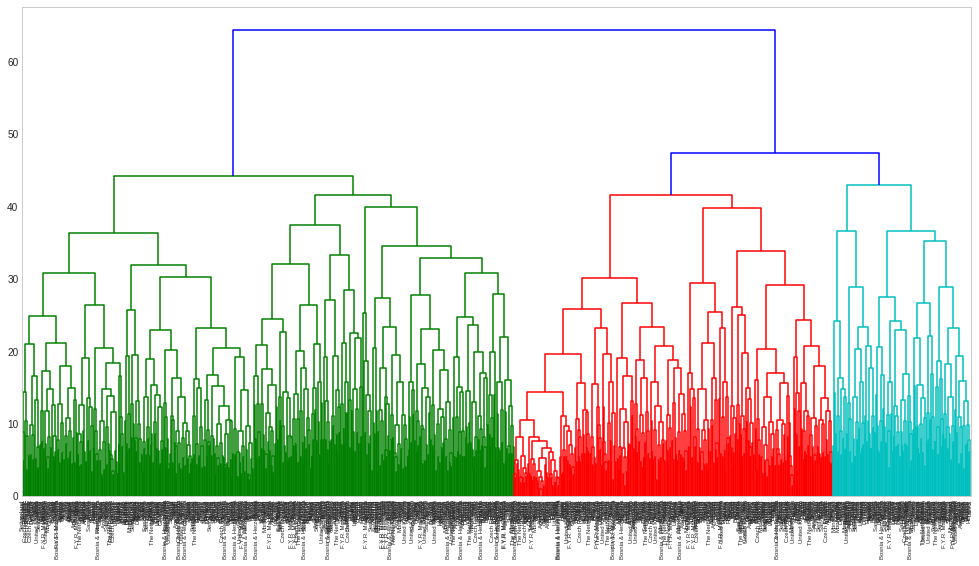

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(eurov_samples, method='complete')

#plotting th dendogram
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[17, 9])
plt.grid(b=False)

dendrogram(mergings,
           labels=eurov_country_names,
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

## EXERCISE

### Hierarchical clustering of the grain data
In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

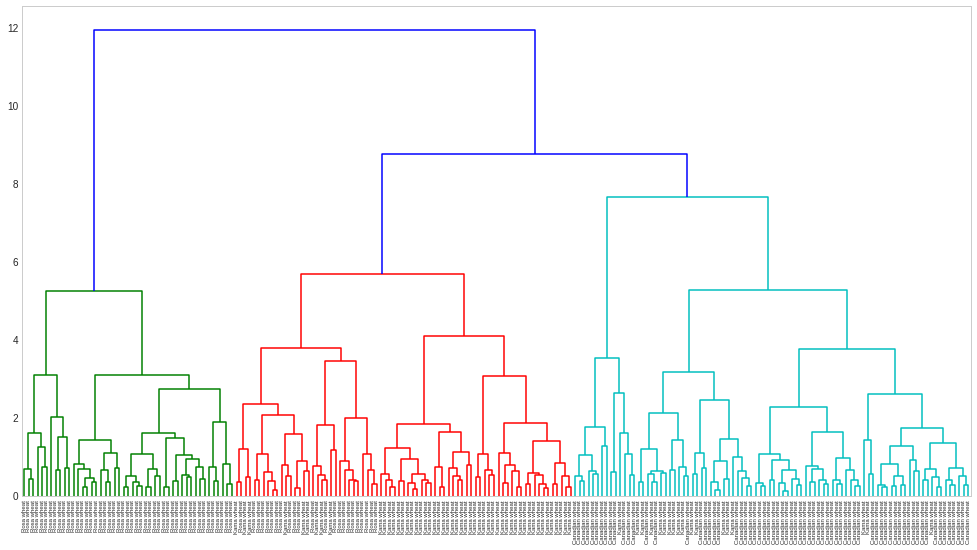

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(grain_samples, method='complete')

# Plot the dendrogram, using varieties as labels

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[17, 9])
plt.grid(b=False)

nuga = dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)

plt.show()

## EXERCISE

###Extracting the cluster labels

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

In [37]:
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


## EXERCISE 

### Hierarchies of stocks

In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

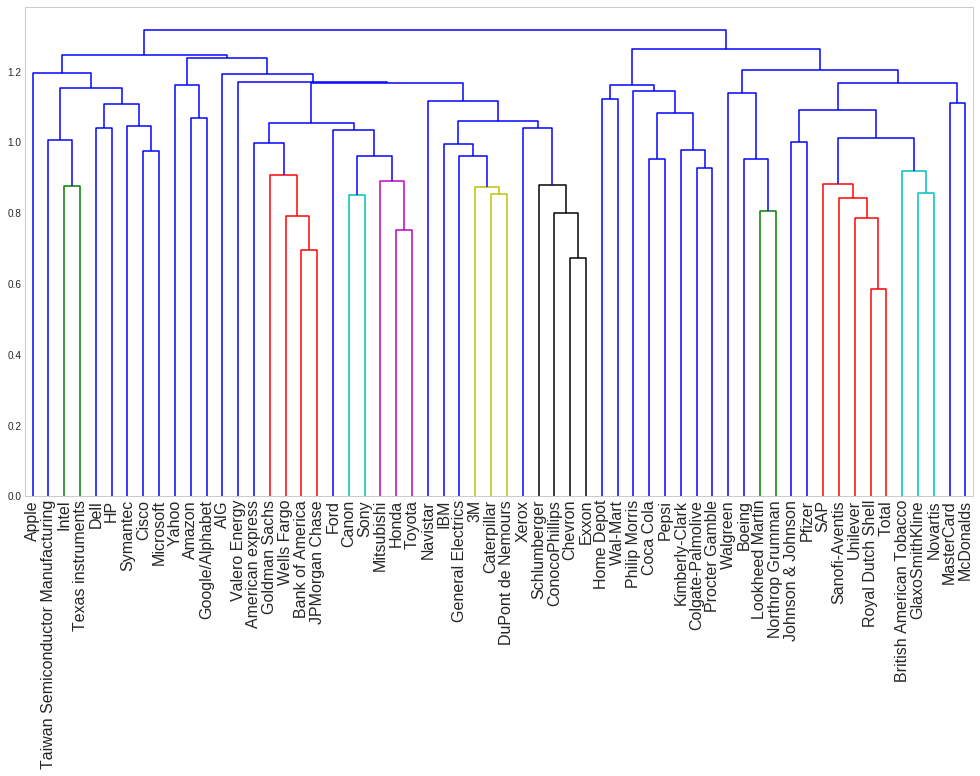

In [38]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[17, 9])
plt.grid(b=False)

dendrogram(mergings, labels=stock_companies, leaf_rotation=90, leaf_font_size=16)
plt.show()

## t-SNE for 2-dimensional maps
- t-SNE = “t-distributed stochastic neighbor embedding”
- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets

###t-SNE on the iris dataset
- Iris dataset has 4 measurements, so samples are 4-dimensional
- t-SNE maps samples to 2D space
- t-SNE didn't know that there were different species

In [39]:
iris_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


<Figure size 432x288 with 0 Axes>

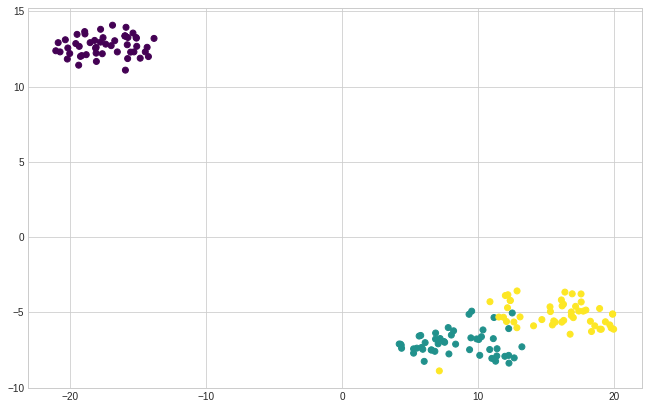

In [40]:
iris_samples = iris_df.drop('species', axis=1).values
iris_species = iris_df['species'].values

from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)

transformed = model.fit_transform(iris_samples)

# make the scatter plot
xs = transformed[:,0]
ys = transformed[:,1]
plt.set_cmap('viridis')

plt.figure(figsize=[11, 7])
plt.scatter(x=xs,y=ys, c=iris_species)

plt.show()

## EXERCISE

TSNE on grain data

In [41]:
variety_numbers = np.unique(varieties, return_inverse=True)[1].tolist()
set(variety_numbers)

{0, 1, 2}

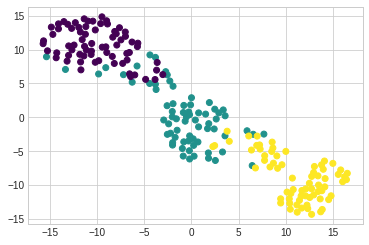

In [42]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(grain_samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

## Visualizing the PCA transformation

###Dimension reduction
- More efficient storage and computation
- Remove less-informative "noise" features
- ... which cause problems for prediction tasks, e.g. classification, regression

###Principal Component Analysis
- PCA = "Principal Component Analysis"
- Fundamental dimension reduction technique
- Dimension reduction is done in 2 steps: 
	- First step "decorrelation" (considered here)
	- Second step reduces dimension (considered later)

####PCA aligns data with axes
- Rotates data samples to be aligned with axes
- Shifts data samples so they have mean 0
- No information is lost

####PCA follows the fit/transform pa!ern
- PCA a scikit-learn component like KMeans or StandardScaler
- fit() learns the transformation from given data
- transform() applies the learned transformation
- transform() can also be applied to new data

## EXERCISE

###Correlated data in nature

You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [43]:
grain.rename(mapper={3: 'width', 4: 'length'}, axis='columns', inplace=True)
grain.head(1)

,0,1,2,width,length,5,6,7,varieties
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1,Kama wheat


In [44]:
grain_wid_len = grain[['width', 'length']].values

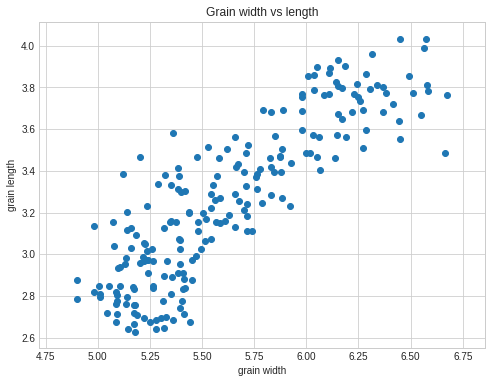

Pearson correlation coefficient: 0.8604149377143467


In [45]:
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grain_wid_len[:,0]

# Assign the 1st column of grains: length
length = grain_wid_len[:,1]

# Scatter plot width vs length
plt.figure(figsize=[8,6])
plt.scatter(width, length)
plt.axis('equal')
plt.xlabel('grain width')
plt.ylabel('grain length')
plt.title('Grain width vs length')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print('Pearson correlation coefficient: {}'.format(correlation))

the width and length of the grain samples are highly correlated

### Decorrelating the grain measurements with PCA

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

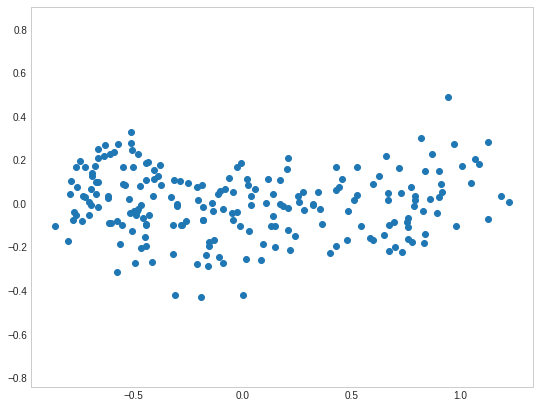

2.4915522998176803e-17


In [46]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grain_wid_len)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.figure(figsize=[9,7])
plt.scatter(xs, ys)
plt.axis('equal')
plt.grid(False)
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## Intrinsic dimension
- Intrinsic dimension = number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
- Can be detected with PCA
- Intrinsic dimension is dimension representation of the data which is usually reduced and not much information is lost. This is done to reduce the dimensions of teh dataset.

## EXERCISE

### The first principal component

The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grain_len_wid gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

In [47]:
grain_len_wid = np.flip(grain_wid_len, axis=1)
grain_len_wid[0, :]

array([3.312, 5.763])

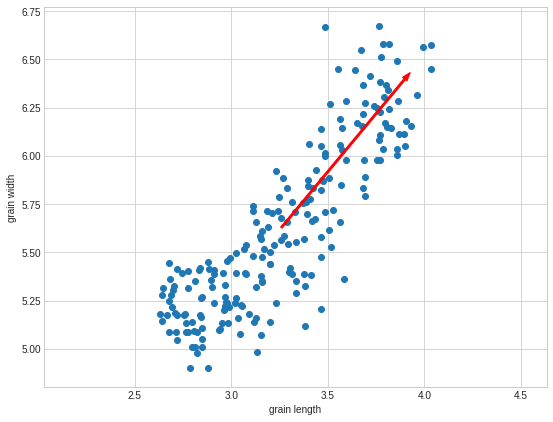

In [48]:
# Make a scatter plot of the untransformed points
plt.figure(figsize=[9,7])
plt.scatter(grain_len_wid[:,0], grain_len_wid[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grain_len_wid)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.xlabel('grain length')
plt.ylabel('grain width')
plt.show()

 This is the direction in which the grain data varies the most.

###Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [49]:
fish_samples[0,:]

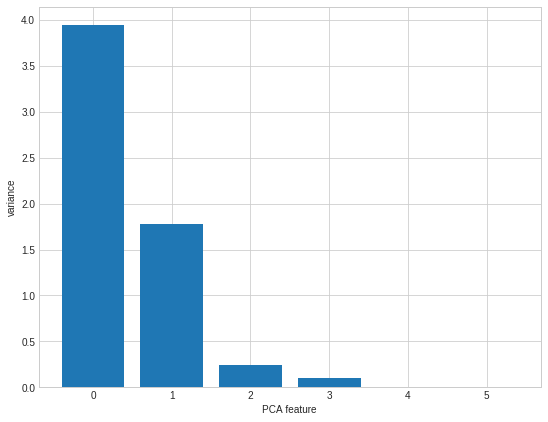

In [50]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(fish_samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=[9,7])
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

It looks like PCA features 0 and 1 have significant variance. Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

## Dimension reduction with PCA

- Represents same data, using less features
- Important part of machine-learning pipelines
- Can be performed using PCA
- PCA features are in decreasing order of variance
- Assumes the low variance features are "noise"
- ... and high variance features are informative
- Specify how many features to keep
- E.g. PCA(n_components=2)
- Keeps the first 2 PCA features
- Intrinsic dimension is a good choice

### Reducing iris dataset dimension

In [51]:
iris_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


First lets determine the intrinsic dimension of iris dataset

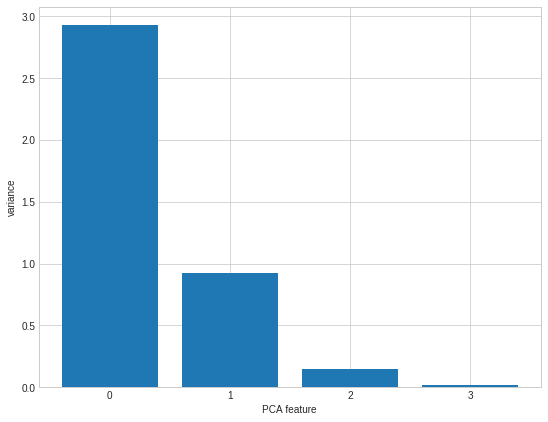

In [52]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(iris_samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=[9,7])
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

The intrinsic dimensions seems to be 2. Now lets reduce it to 2

In [53]:
pca = PCA(n_components=2)

pca.fit(iris_samples)

transformed = pca.transform(iris_samples)

transformed.shape

(150, 2)

There are now only two features - just as we expected.

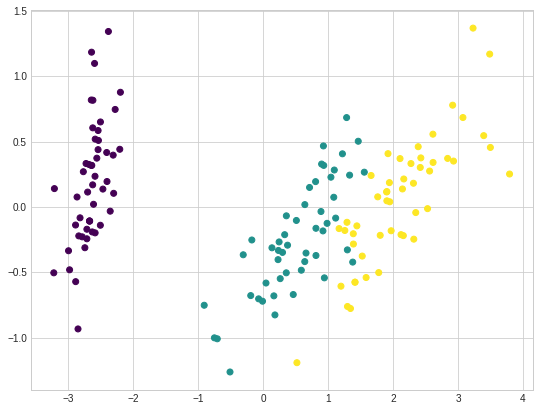

In [54]:
# iris dataset in 2D
xs = transformed[:,0]
ys = transformed[:,1]

plt.figure(figsize=[9,7])
plt.scatter(xs, ys, c=iris_species)

plt.show()

## EXERCISE Fish dataset

Lets determine the intrinsic dimension of the fish dataset.

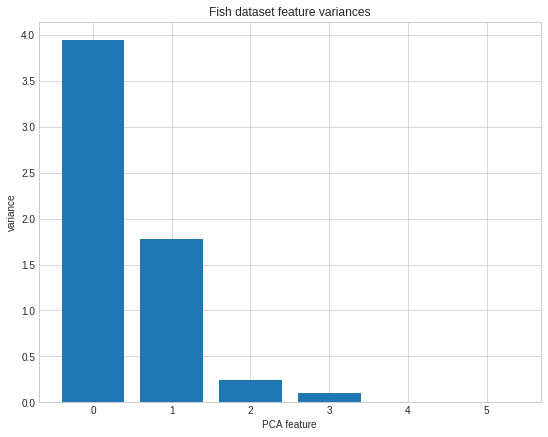

In [58]:
scaler = StandardScaler()

pca = PCA()

pipeline = make_pipeline(scaler, pca)

pipeline.fit(fish_samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=[9,7])
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.title('Fish dataset feature variances')
plt.show()

The intrinsic dimension of fish dataset seems to be 2, other variances are very low and can be discarded

In [67]:
fish_df.head(1)

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4


In [71]:
fish_df[0] = fish_df[0].astype('category')

fish_species_numb = pd.factorize(fish_df[0])[0]
fish_species_numb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

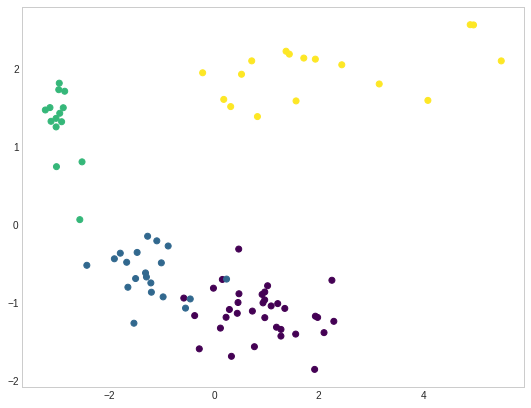

In [72]:
# creating the scaler object
scaler = StandardScaler()

# scaling the fish samples
scaled_fish = scaler.fit_transform(fish_samples)

# creating the pca object
pca = PCA(n_components=2)

# fitting the data
pca.fit(scaled_fish)

transformed = pca.transform(scaled_fish)

# getting the coordinates
xs = transformed[:,0]
ys = transformed[:,1]

#plotting the clusters
plt.figure(figsize=[9,7])
plt.scatter(xs, ys, c=fish_species_numb)
plt.grid(False)
plt.show()


## Word frequency arrays

- Each row represents a document, each column represents a particular word
- Entiries measure presence of each word in each document 
- Most entires are 0 though since many words are not included in any document
- Arrays like these are said to be 'sparse' - most entries are 0.
- This case scipy.sparse.csr_matrix can be used for an alternative to NumPy array
- csr_matrixes saves space since it remembers non-zero entries only
- scikit-learn PCA doesn't support csr_matrixes
- have to use scikit-learn TruncatedSVD instead 
- TruncatedSVD performs same transformations as PCA but accepts csr_matrixes as input

In [74]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

## EXERCISE 

###A tf-idf word-frequency array

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

In [85]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

print(documents, '\n')

# Print result of toarray() method
print(np.around(csr_mat.toarray(), decimals=2))

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print('\n{}'.format(words))

['cats say meow', 'dogs say woof', 'dogs chase cats'] 

[[0.52 0.   0.   0.68 0.52 0.  ]
 [0.   0.   0.52 0.   0.52 0.68]
 [0.52 0.68 0.52 0.   0.   0.  ]]

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


## EXERCISE

###Clustering Wikipedia part I

You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. 

We need to preprocess the `wikipedia-vectors.csv` into appropriate format. The reason for taking this transpose is that without it, there would be 13,000 columns (corresponding to the 13,000 words in the file), which is a lot of columns for a CSV to have.


In [86]:
# we need to transpose the csr_matrix
from scipy.sparse import csr_matrix

df = pd.read_csv(csv_path + 'Wikipedia articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [88]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)

kmeans = KMeans(n_clusters=6)

pipeline = make_pipeline(svd, kmeans)

It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

In [89]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

                                          article  label
36              2014 FIFA World Cup qualification      0
30                  France national football team      0
31                              Cristiano Ronaldo      0
32                                   Arsenal F.C.      0
33                                 Radamel Falcao      0
34                             Zlatan Ibrahimović      0
39                                  Franck Ribéry      0
38                                         Neymar      0
35                Colombia national football team      0
37                                       Football      0
48                                     Gabapentin      1
47                                          Fever      1
49                                       Lymphoma      1
40                                    Tonsillitis      1
41                                    Hepatitis B      1
42                                    Doxycycline      1
43                             

##Non-negative matrix factorization
- NMF = "non-negative matrix factorization"
- Dimension reduction technique
- NMF models are interpretable (unlike PCA)
- Easy to interpret means easy to explain!
- However, all sample features must be non-negative (>= 0)

###Interpretable parts
-NMF expresses documents as combinations of topics (or "themes")
-NMF expresses images as combinations of pa!erns

###Using scikit-learn NMF
- Follows fit() / transform() pa!ern
- Must specify number of components e.g. NMF(n_components=2)
- Works with NumPy arrays and with csr_matrix

###Example word-frequency array
- Word frequency array, 4 words, many documents
- Measure presence of words in each document using "tf-idf"
- "tf" = frequency of word in document
- "idf" reduces influence of frequent words

###NMF components
- NMF has components
- ... just like PCA has principal components
- Dimension of components = dimension of samples
- Entries are non-negative

## EXERCISE

###NMF applied to Wikipedia articles
Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

In [93]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(np.around(nmf_features[:5,:], decimals=3))

[[0.    0.    0.    0.    0.    0.44 ]
 [0.    0.    0.    0.    0.    0.567]
 [0.004 0.    0.    0.    0.    0.399]
 [0.    0.    0.    0.    0.    0.382]
 [0.    0.    0.    0.    0.    0.485]]


these NMF features don't make much sense at this point, but you will explore them in the next exercise

Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array nmf_features is available. Also available is a list titles giving the title of each Wikipedia article.

In [95]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003845
1    0.000000
2    0.000000
3    0.575638
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422326
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

##NMF learns interpretable parts

- the components of NMF represent patterns of frequently occuring samples

###NMF components
-For documents:
	- NMF components represent topics
	- NMF features combine topics into documents
-For images, NMF components are parts of images

###Grayscale images
- "Grayscale" image = no colors, only shades of gray
- Measure pixel brightness
- Represent with value between 0 and 1 (0 is black)
- Convert to 2D array

## ECERCISE

###NMF learns topics of documents

In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

In [101]:
words_df = pd.read_csv(csv_path + 'Wikipedia articles/wikipedia-vocabulary-utf8.txt', header=None)
wiki_words = words_df[0].values
wiki_words

array(['aaron', 'abandon', 'abandoned', ..., 'zone', 'zones', 'zoo'],
      dtype=object)

In [108]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=wiki_words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(np.around(component.nlargest(), decimals=3))

(6, 13125)
film       0.628
award      0.253
starred    0.245
role       0.211
actress    0.186
Name: 3, dtype: float64


## EXERCISE

###Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

In [109]:
lcd_digits_df = pd.read_csv(csv_path + 'lcd-digits.csv', header=None)
lcd_digits_samples = lcd_digits_df.values
lcd_digits_samples.shape

(100, 104)

Raw array:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

Reshaped array:
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


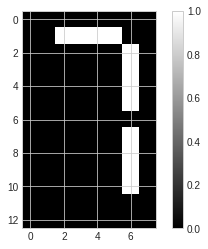

In [113]:
# Select the 0th row: digit
digit = lcd_digits_samples[0,:]

# Print digit
print('Raw array:\n{}'.format(digit))

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print('\nReshaped array:\n{}'.format(bitmap))

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

## EXERCISE

In [114]:
#displays the image encoded by any 1D array

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

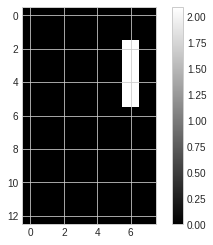

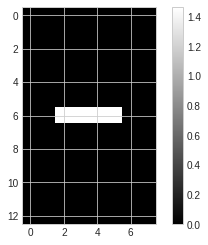

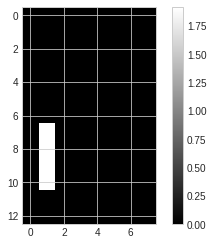

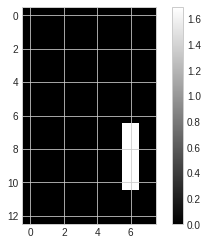

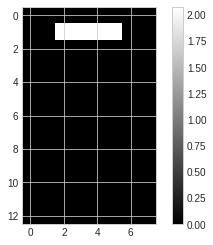

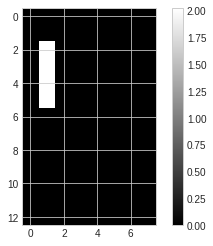

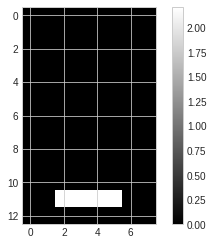

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37573765e-16]


In [115]:
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(lcd_digits_samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

## Building recommender systems using NMF

###Finding similar articles
- Engineer at a large online newspaper
- Task: recommend articles similar to article being read bycustomer
- Similar articles should have similar topics

### Strategy
- Apply NMF to the word-frequency array of the articles and use resulting NMF features
- NMF feature values describe the topics
- ... so similar documents have similar NMF feature values
- Compare NMF feature values? - Before answering this lets make the first steps.

In [122]:
img_path = '/home/ilves/Documents/Python_Learning/jupyter_files/images/'

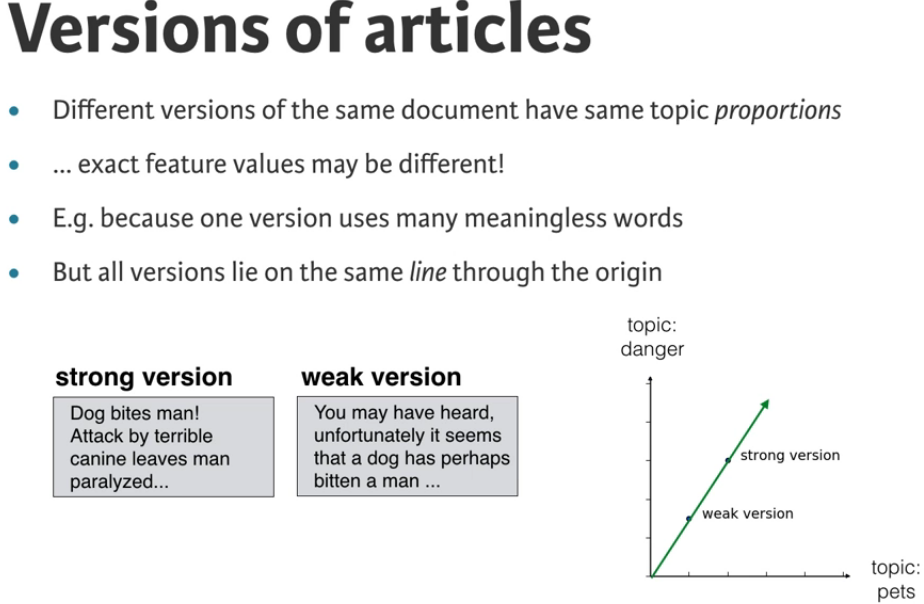

In [120]:
from IPython.display import Image
Image('/home/ilves/Documents/Python_Learning/jupyter_files/images/article_ver.png')

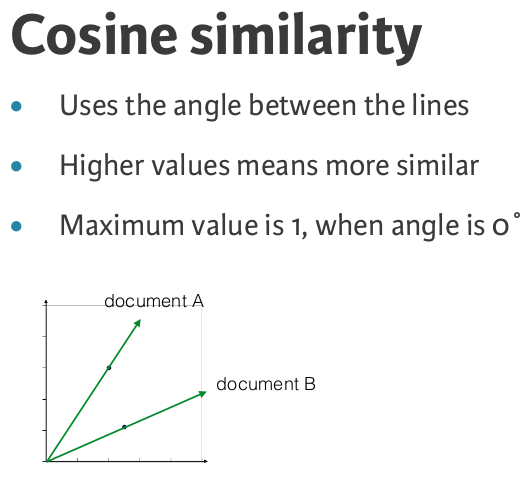

In [124]:
Image(img_path + 'cosine_simi.png')

## EXERCISE

###Which articles are similar to 'Cristiano Ronaldo'?

In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

In [132]:
# creating the nmf_features
model = NMF(n_components=6)

nmf_features = model.fit_transform(articles)

titles[:5]

['HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search']

In [134]:
# Perform the necessary imports
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities, Apply the .dot() method of df 
# to article to calculate the cosine similarity of every row with article.
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


In [137]:
artists_df = pd.read_csv(csv_path + 'Musical artists/artists.csv', header=None)
artists = artists_df.iloc[:,0].values

music_users_df = pd.read_csv(csv_path + 'Musical artists/scrobbler-small-sample.csv')
artists.shape

(111,)